# API Crypto Website


In [112]:
    # This code from coinmarketcap.com
    #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',     #can limit row 
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '1d22143b-15e7-4ca2-99e4-88c64ecd4118',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-03-20T09:28:59.199Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 9061}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10099, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

#Nomalizing make it look better

In [113]:
type(data)

dict

In [114]:
import pandas as pd

pd.set_option('display.max_columns', None)  #to see every single column
pd.set_option('display.max_rows', None)

In [115]:
#Normalized JSON

pd.json_normalize(data)

,data,status.timestamp,status.error_code,status.error_message,status.elapsed,status.credit_count,status.notice,status.total_count
0,"[{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC',...",2023-03-20T09:28:59.199Z,0,None,33,1,None,9061


In [116]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2023-03-20T09:28:59.199Z,0,None,33,1,None,9061


In [117]:
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19322706.00000,19322706.00000,NaN,1,NaN,NaN,None,2023-03-20T09:27:00.000Z,28291.40605,47079908688.25605,51.22790,0.05856,4.74337,27.36579,15.12348,36.08982,68.22927,546666521389.53699,46.30820,594119527005.18994,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6596,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-20T09:27:00.000Z,1787.23489,11365058073.24934,32.39210,-0.26598,0.69072,12.30134,5.46491,16.98587,47.80128,218710843022.35849,18.53900,218710843022.35999,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,49752,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76109949431.26085,79091735571.99397,NaN,3,NaN,NaN,None,2023-03-20T09:27:00.000Z,1.00299,54990984629.67567,37.75930,-0.03291,0.04423,-0.01397,0.27961,0.29832,0.28309,76337144714.88403,6.46990,79327831764.80000,None,2023-03-20T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1217,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891047.78705,159979963.59043,NaN,4,NaN,NaN,None,2023-03-20T09:27:00.000Z,338.19138,684045277.93592,-15.69010,0.43493,0.80961,12.25493,6.80742,16.22367,36.63953,53397392085.62734,4.52510,54103845413.73000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN
4,3408,USD Coin,USDC,usd-coin,11017,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36165110230.86342,36165110230.86342,NaN,5,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.99967,5185205126.03163,24.87080,-0.03291,0.00799,0.95972,-0.02861,-0.03219,-0.02742,36153118910.22926,3.06410,36153118910.23000,None,2023-03-20T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.38344,1345789005.42882,74.37990,-0.10437,0.44652,5.34841,-2.68894,-0.22556,11.27679,19536689945.23407,1.65560,38344141084.95000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN
6,2010,Cardano,ADA,cardano,709,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34714072452.81300,35591462141.75800,NaN,7,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.34383,332086305.84728,16.40460,-0.01614,0.99487,2.00335,-14.54620,3.18761,33.14876,11935909974.34610,1.01160,15472570945.85000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN
7,3890,Polygon,MATIC,polygon,621,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-20T09:27:00.000Z,1.15997,605109800.36960,41.08860,0.46559,-1.85849,3.48694,-24.01738,22.94004,45.37163,10131531056.83519,0.85880,11599682614.59000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN
8,74,Dogecoin,DOGE,dogecoin,663,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,9,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.07436,407620209.99278,2.26890,-0.4

In [118]:
# add a column of time stamp right now

df['timestamp'] = pd.to_datetime('now')
df

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19322706.00000,19322706.00000,NaN,1,NaN,NaN,None,2023-03-20T09:27:00.000Z,28291.40605,47079908688.25605,51.22790,0.05856,4.74337,27.36579,15.12348,36.08982,68.22927,546666521389.53699,46.30820,594119527005.18994,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
1,1027,Ethereum,ETH,ethereum,6596,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-20T09:27:00.000Z,1787.23489,11365058073.24934,32.39210,-0.26598,0.69072,12.30134,5.46491,16.98587,47.80128,218710843022.35849,18.53900,218710843022.35999,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
2,825,Tether,USDT,tether,49752,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76109949431.26085,79091735571.99397,NaN,3,NaN,NaN,None,2023-03-20T09:27:00.000Z,1.00299,54990984629.67567,37.75930,-0.03291,0.04423,-0.01397,0.27961,0.29832,0.28309,76337144714.88403,6.46990,79327831764.80000,None,2023-03-20T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-20 09:29:38.549931
3,1839,BNB,BNB,bnb,1217,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891047.78705,159979963.59043,NaN,4,NaN,NaN,None,2023-03-20T09:27:00.000Z,338.19138,684045277.93592,-15.69010,0.43493,0.80961,12.25493,6.80742,16.22367,36.63953,53397392085.62734,4.52510,54103845413.73000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
4,3408,USD Coin,USDC,usd-coin,11017,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36165110230.86342,36165110230.86342,NaN,5,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.99967,5185205126.03163,24.87080,-0.03291,0.00799,0.95972,-0.02861,-0.03219,-0.02742,36153118910.22926,3.06410,36153118910.23000,None,2023-03-20T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-20 09:29:38.549931
5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.38344,1345789005.42882,74.37990,-0.10437,0.44652,5.34841,-2.68894,-0.22556,11.27679,19536689945.23407,1.65560,38344141084.95000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
6,2010,Cardano,ADA,cardano,709,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34714072452.81300,35591462141.75800,NaN,7,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.34383,332086305.84728,16.40460,-0.01614,0.99487,2.00335,-14.54620,3.18761,33.14876,11935909974.34610,1.01160,15472570945.85000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
7,3890,Polygon,MATIC,polygon,621,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-20T09:27:00.000Z,1.15997,605109800.36960,41.08860,0.46559,-1.85849,3.48694,-24.01738,22.94004,45.37163,10131531056.83519,0.85880,11599682614.59000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
8,74,

In [119]:
#Automating the Data Pull
#define funtion to call API and add a timestamp column like above

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',     #can limit row 
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '1d22143b-15e7-4ca2-99e4-88c64ecd4118',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
#apply dataframe and add a timestamp column

    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df                   #new data will come into it and pull data everytime and append to the original data frame

#to csv
    #if not os.path.isfile(r'C:\Users\Lenovo\OneDrive\Documents\Python Scripts\API.csv'):  #check that file not exist (we name the API.csv)
    #    df.to_csv(r'C:\Users\Lenovo\OneDrive\Documents\Python Scripts\API.csv', header = 'column_names')
    #else:
    #    df.to_csv(r'C:\Users\Lenovo\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False) #a = append and don't want header everytime append
        
        

In [120]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)  #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-03-20T09:29:58.491Z', 'error_code': 0, 'error_message': None, 'elapsed': 14, 'credit_count': 1, 'notice': None, 'total_count': 9061}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10099, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11528\3400000906.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-03-20T09:30:59.481Z', 'error_code': 0, 'error_message': None, 'elapsed': 169, 'credit_count': 1, 'notice': None, 'total_count': 9061}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10099, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11528\3400000906.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-03-20T09:32:00.385Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 9061}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10099, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11528\3400000906.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


KeyboardInterrupt: 

In [41]:
#read csv

#df_csv = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Documents\Python Scripts\API.csv')
#df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.932262e+07,1.932262e+07,NaN,1,NaN,NaN,NaN,2023-03-20T07:15:00.000Z,27967.089416,4.282515e+10,34.4758,1.112144,3.657946,24.646989,13.723753,34.152141,66.243592,5.403974e+11,46.2423,5.873089e+11,NaN,2023-03-20T07:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:16:46.248858
1,1,1027,Ethereum,ETH,ethereum,6595,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-03-20T07:15:00.000Z,1776.157128,1.054499e+10,18.5870,0.446704,0.214440,10.441190,4.786842,16.014827,46.656727,2.173552e+11,18.5695,2.173552e+11,NaN,2023-03-20T07:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:16:46.248858
2,2,825,Tether,USDT,tether,49741,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.610995e+10,7.909174e+10,NaN,3,NaN,NaN,NaN,2023-03-20T07:15:00.000Z,1.003339,5.048426e+10,22.8170,0.006572,0.103410,-0.109011,0.313929,0.335056,0.318498,7.636410e+10,6.5497,7.935584e+10,NaN,2023-03-20T07:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-20 07:16:46.248858
3,3,1839,BNB,BNB,bnb,1217,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578911e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-03-20T07:15:00.000Z,336.178187,6.244521e+08,-13.2520,0.011960,0.623889,10.532117,5.496692,15.621545,35.058255,5.307953e+10,4.5497,5.378177e+10,NaN,2023-03-20T07:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:16:46.248858
4,4,3408,USD Coin,USDC,usd-coin,11015,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.621204e+10,3.621204e+10,NaN,5,NaN,NaN,NaN,2023-03-20T07:15:00.000Z,1.000014,4.723525e+09,11.3174,0.002261,0.050284,0.856353,-0.001069,-0.002222,-0.003162,3.621256e+10,3.1059,3.621256e+10,NaN,2023-03-20T07:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-20 07:16:46.248858
5,5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-03-20T07:15:00.000Z,0.383683,1.286272e+09,63.0074,-0.227660,1.342779,3.949132,-2.914387,-0.253618,11.674650,1.954898e+10,1.6756,3.836826e+10,NaN,2023-03-20T07:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:16:46.248858
6,6,2010,Cardano,ADA,cardano,708,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.471375e+10,3.559146e+10,NaN,7,NaN,NaN,NaN,2023-03-20T07:15:00.000Z,0.343464,3.107822e+08,4.7391,0.344738,1.204341,0.617142,-14.595379,3.396184,33.267184,1.192293e+10,1.0226,1.545590e+10,NaN,2023-03-20T07:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:16:46.248858
7,7,3890,Polygon,MATIC,polygon,620,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,NaN,2023-03-20T07:15:00.000Z,1.143932,5.380287e+08,20.9684,0.366737,-3.067842,0.545402,-25.520984,20.808556,42.879587,9.991465e+09,0.8536,1.143932e+10,NaN,2023-03-20T07:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 07:16:46.248858
8,8,74,Dogecoin,DOGE,dogecoin,662,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,NaN,2023-03

In [121]:
# read dada frame
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19322706.00000,19322706.00000,NaN,1,NaN,NaN,None,2023-03-20T09:27:00.000Z,28291.40605,47079908688.25605,51.22790,0.05856,4.74337,27.36579,15.12348,36.08982,68.22927,546666521389.53699,46.30820,594119527005.18994,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
1,1027,Ethereum,ETH,ethereum,6596,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-20T09:27:00.000Z,1787.23489,11365058073.24934,32.39210,-0.26598,0.69072,12.30134,5.46491,16.98587,47.80128,218710843022.35849,18.53900,218710843022.35999,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
2,825,Tether,USDT,tether,49752,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76109949431.26085,79091735571.99397,NaN,3,NaN,NaN,None,2023-03-20T09:27:00.000Z,1.00299,54990984629.67567,37.75930,-0.03291,0.04423,-0.01397,0.27961,0.29832,0.28309,76337144714.88403,6.46990,79327831764.80000,None,2023-03-20T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-20 09:29:38.549931
3,1839,BNB,BNB,bnb,1217,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891047.78705,159979963.59043,NaN,4,NaN,NaN,None,2023-03-20T09:27:00.000Z,338.19138,684045277.93592,-15.69010,0.43493,0.80961,12.25493,6.80742,16.22367,36.63953,53397392085.62734,4.52510,54103845413.73000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
4,3408,USD Coin,USDC,usd-coin,11017,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36165110230.86342,36165110230.86342,NaN,5,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.99967,5185205126.03163,24.87080,-0.03291,0.00799,0.95972,-0.02861,-0.03219,-0.02742,36153118910.22926,3.06410,36153118910.23000,None,2023-03-20T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-20 09:29:38.549931
5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.38344,1345789005.42882,74.37990,-0.10437,0.44652,5.34841,-2.68894,-0.22556,11.27679,19536689945.23407,1.65560,38344141084.95000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
6,2010,Cardano,ADA,cardano,709,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34714072452.81300,35591462141.75800,NaN,7,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.34383,332086305.84728,16.40460,-0.01614,0.99487,2.00335,-14.54620,3.18761,33.14876,11935909974.34610,1.01160,15472570945.85000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
7,3890,Polygon,MATIC,polygon,621,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-20T09:27:00.000Z,1.15997,605109800.36960,41.08860,0.46559,-1.85849,3.48694,-24.01738,22.94004,45.37163,10131531056.83519,0.85880,11599682614.59000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
8,74,

In [123]:
#make numbers readable 

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [124]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19322706.00000,19322706.00000,NaN,1,NaN,NaN,None,2023-03-20T09:27:00.000Z,28291.40605,47079908688.25605,51.22790,0.05856,4.74337,27.36579,15.12348,36.08982,68.22927,546666521389.53699,46.30820,594119527005.18994,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
1,1027,Ethereum,ETH,ethereum,6596,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-03-20T09:27:00.000Z,1787.23489,11365058073.24934,32.39210,-0.26598,0.69072,12.30134,5.46491,16.98587,47.80128,218710843022.35849,18.53900,218710843022.35999,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
2,825,Tether,USDT,tether,49752,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,76109949431.26085,79091735571.99397,NaN,3,NaN,NaN,None,2023-03-20T09:27:00.000Z,1.00299,54990984629.67567,37.75930,-0.03291,0.04423,-0.01397,0.27961,0.29832,0.28309,76337144714.88403,6.46990,79327831764.80000,None,2023-03-20T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-20 09:29:38.549931
3,1839,BNB,BNB,bnb,1217,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157891047.78705,159979963.59043,NaN,4,NaN,NaN,None,2023-03-20T09:27:00.000Z,338.19138,684045277.93592,-15.69010,0.43493,0.80961,12.25493,6.80742,16.22367,36.63953,53397392085.62734,4.52510,54103845413.73000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
4,3408,USD Coin,USDC,usd-coin,11017,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,36165110230.86342,36165110230.86342,NaN,5,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.99967,5185205126.03163,24.87080,-0.03291,0.00799,0.95972,-0.02861,-0.03219,-0.02742,36153118910.22926,3.06410,36153118910.23000,None,2023-03-20T09:27:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-20 09:29:38.549931
5,52,XRP,XRP,xrp,906,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.38344,1345789005.42882,74.37990,-0.10437,0.44652,5.34841,-2.68894,-0.22556,11.27679,19536689945.23407,1.65560,38344141084.95000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
6,2010,Cardano,ADA,cardano,709,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34714072452.81300,35591462141.75800,NaN,7,NaN,NaN,None,2023-03-20T09:27:00.000Z,0.34383,332086305.84728,16.40460,-0.01614,0.99487,2.00335,-14.54620,3.18761,33.14876,11935909974.34610,1.01160,15472570945.85000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
7,3890,Polygon,MATIC,polygon,621,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-03-20T09:27:00.000Z,1.15997,605109800.36960,41.08860,0.46559,-1.85849,3.48694,-24.01738,22.94004,45.37163,10131531056.83519,0.85880,11599682614.59000,None,2023-03-20T09:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-20 09:29:38.549931
8,74,

In [125]:
#group avg percent change

df_group = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df_group

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02436,4.75820,27.54458,15.18307,36.14990,68.24067
Ethereum,-0.31024,0.69203,12.46188,5.50435,17.04177,47.82324
Tether,-0.02884,0.04489,-0.02390,0.28569,0.30378,0.28813
BNB,0.39947,0.86093,12.36143,6.85691,16.28200,36.62770
USD Coin,-0.02212,0.00504,0.97688,-0.02356,-0.02348,-0.02301
XRP,-0.13815,0.47635,5.40722,-2.65191,-0.18582,11.28406
Cardano,-0.02248,1.08495,2.11519,-14.49746,3.26436,33.20438
Polygon,0.40434,-1.79875,3.59450,-23.97604,22.98686,45.35029
Dogecoin,-0.48109,0.22427,6.54787,-15.12010,-8.09051,0.37575


In [126]:
#swap rows and colomns

df_stack = df_group.stack()
df_stack

name                                     
Bitcoin      quote.USD.percent_change_1h      0.02436
             quote.USD.percent_change_24h     4.75820
             quote.USD.percent_change_7d     27.54458
             quote.USD.percent_change_30d    15.18307
             quote.USD.percent_change_60d    36.14990
             quote.USD.percent_change_90d    68.24067
Ethereum     quote.USD.percent_change_1h     -0.31024
             quote.USD.percent_change_24h     0.69203
             quote.USD.percent_change_7d     12.46188
             quote.USD.percent_change_30d     5.50435
             quote.USD.percent_change_60d    17.04177
             quote.USD.percent_change_90d    47.82324
Tether       quote.USD.percent_change_1h     -0.02884
             quote.USD.percent_change_24h     0.04489
             quote.USD.percent_change_7d     -0.02390
             quote.USD.percent_change_30d     0.28569
             quote.USD.percent_change_60d     0.30378
             quote.USD.percent_change_90

In [127]:
type(df_stack)

pandas.core.series.Series

In [128]:
# back to data frame
df_values = df_stack.to_frame(name='values')
df_values

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.02436
            quote.USD.percent_change_24h   4.75820
            quote.USD.percent_change_7d   27.54458
            quote.USD.percent_change_30d  15.18307
            quote.USD.percent_change_60d  36.14990
            quote.USD.percent_change_90d  68.24067
Ethereum    quote.USD.percent_change_1h   -0.31024
            quote.USD.percent_change_24h   0.69203
            quote.USD.percent_change_7d   12.46188
            quote.USD.percent_change_30d   5.50435
            quote.USD.percent_change_60d  17.04177
            quote.USD.percent_change_90d  47.82324
Tether      quote.USD.percent_change_1h   -0.02884
            quote.USD.percent_change_24h   0.04489
            quote.USD.percent_change_7d   -0.02390
            quote.USD.percent_change_30d   0.28569
            quote.USD.percent_change_60d   0.30378
            quote.USD.percent_change_90d   0.28813
BNB         quote.USD.percent_change_1h    0.39947
            quote.USD.percent_change_24h   0.86093
            quote.USD.percent_change_7d   12.36143
            quote.USD.percent_change_30d   6.85691
            quote.USD.percent_change_60d  16.28200
            quote.USD.percent_change_90d  36.62770
USD Coin    quote.USD.percent_change_1h   -0.02212
            quote.USD.percent_change_24h   0.00504
            quote.USD.percent_change_7d    0.97688
            quote.USD.percent_change_30d  -0.02356
            quote.USD.percent_change_60d  -0.02348
            quote.USD.percent_change_90d  -0.02301
XRP         quote.USD.percent_change_1h   -0.13815
            quote.USD.percent_change_24h   0.47635
            quote.USD.percent_change_7d    5.40722
            quote.USD.percent_change_30d  -2.65191
            quote.USD.percent_change_60d  -0.18582
            quote.USD.percent_change_90d  11.28406
Cardano     quote.USD.percent_change_1h   -0.02248
            quote.USD.percent_change_24h   1.08495
            quote.USD.percent_change_7d    2.11519
            quote.USD.percent_change_30d -14.49746
            quote.USD.percent_change_60d   3.26436
            quote.USD.percent_change_90d  33.20438
Polygon     quote.USD.percent_change_1h    0.40434
            quote.USD.percent_change_24h  -1.79875
            quote.USD.percent_change_7d    3.59450
            quote.USD.percent_change_30d -23.97604
            quote.USD.percent_change_60d  22.98686
            quote.USD.percent_change_90d  45.35029
Dogecoin    quote.USD.percent_change_1h   -0.48109
            quote.USD.percent_change_24h   0.22427
            quote.USD.percent_change_7d    6.54787
            quote.USD.percent_change_30d -15.12010
            quote.USD.percent_change_60d  -8.09051
            quote.USD.percent_change_90d   0.37575
Solana      quote.USD.percent_change_1h    1.23960
            quote.USD.percent_change_24h   9.41205
            quote.USD.percent_change_7d   20.83495
            quote.USD.percent_change_30d   1.47418
            quote.USD.percent_change_60d  10.89186
            quote.USD.percent_change_90d  90.34322
Binance USD quote.USD.percent_change_1h   -0.00405
            quote.USD.percent_change_24h   0.03114
            quote.USD.percent_change_7d    0.09443
            quote.USD.percent_change_30d   0.02159
            quote.USD.percent_change_60d   0.00300
            quote.USD.percent_change_90d   0.03753
Polkadot    quote.USD.percent_change_1h    0.19935
            quote.USD.percent_change_24h   0.66628
            quote.USD.percent_change_7d   10.14306
            quote.USD.percent_change_30d -10.67612
            quote.USD.percent_change_60d  11.86323
            quote.USD.percent_change_90d  39.89489
Shiba Inu   quote.USD.percent_change_1h   -0.26839
            quote.USD.percent_change_24h  -0.28207
            quote.USD.percent_change_7d    1.83188
            quote.USD.percent_change_30d -18.05546
            quote.USD.percent_change_60d  -2.96802
            quo

In [129]:
type(df_values)

pandas.core.frame.DataFrame

In [130]:
df_values.count()

values    90
dtype: int64

In [131]:
#giving an index

#index = pd.Index(range(90))

df_reindex = df_values.reset_index()   #reset_index() add the o 1 2 3 ... index
df_reindex

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02436
1,Bitcoin,quote.USD.percent_change_24h,4.75820
2,Bitcoin,quote.USD.percent_change_7d,27.54458
3,Bitcoin,quote.USD.percent_change_30d,15.18307
4,Bitcoin,quote.USD.percent_change_60d,36.14990
5,Bitcoin,quote.USD.percent_change_90d,68.24067
6,Ethereum,quote.USD.percent_change_1h,-0.31024
7,Ethereum,quote.USD.percent_change_24h,0.69203
8,Ethereum,quote.USD.percent_change_7d,12.46188
9,Ethereum,quote.USD.percent_change_30d,5.50435


In [132]:
#rename a column in  the new index

df_newindex = df_reindex.rename(columns={'level_1':'percent_change'})
df_newindex

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02436
1,Bitcoin,quote.USD.percent_change_24h,4.75820
2,Bitcoin,quote.USD.percent_change_7d,27.54458
3,Bitcoin,quote.USD.percent_change_30d,15.18307
4,Bitcoin,quote.USD.percent_change_60d,36.14990
5,Bitcoin,quote.USD.percent_change_90d,68.24067
6,Ethereum,quote.USD.percent_change_1h,-0.31024
7,Ethereum,quote.USD.percent_change_24h,0.69203
8,Ethereum,quote.USD.percent_change_7d,12.46188
9,Ethereum,quote.USD.percent_change_30d,5.50435


In [133]:
df_newindex['percent_change'] = df_newindex['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df_newindex

,name,percent_change,values
0,Bitcoin,1h,0.02436
1,Bitcoin,24h,4.75820
2,Bitcoin,7d,27.54458
3,Bitcoin,30d,15.18307
4,Bitcoin,60d,36.14990
5,Bitcoin,90d,68.24067
6,Ethereum,1h,-0.31024
7,Ethereum,24h,0.69203
8,Ethereum,7d,12.46188
9,Ethereum,30d,5.50435


In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

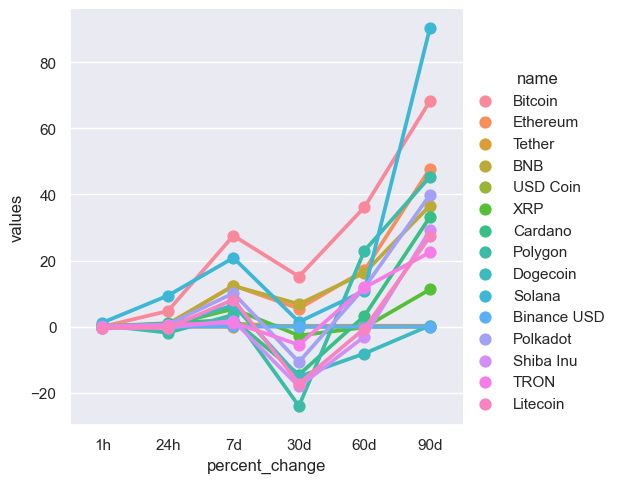

In [172]:
#plor percent change

sns.catplot(x='percent_change', y='values', hue='name', data=df_newindex, kind='point',height=5)
plt.show()

In [158]:
df_price = df[['name','quote.USD.price','timestamp']]
df_price

,name,quote.USD.price,timestamp
0,Bitcoin,28291.40605,2023-03-20 09:29:38.549931
1,Ethereum,1787.23489,2023-03-20 09:29:38.549931
2,Tether,1.00299,2023-03-20 09:29:38.549931
3,BNB,338.19138,2023-03-20 09:29:38.549931
4,USD Coin,0.99967,2023-03-20 09:29:38.549931
5,XRP,0.38344,2023-03-20 09:29:38.549931
6,Cardano,0.34383,2023-03-20 09:29:38.549931
7,Polygon,1.15997,2023-03-20 09:29:38.549931
8,Dogecoin,0.07436,2023-03-20 09:29:38.549931
9,Solana,23.58505,2023-03-20 09:29:38.549931


In [159]:
df_price = df_price.query("name =='Bitcoin'")
df_price

,name,quote.USD.price,timestamp
0,Bitcoin,28291.40605,2023-03-20 09:29:38.549931
0,Bitcoin,28291.40605,2023-03-20 09:29:57.064506
0,Bitcoin,28309.88461,2023-03-20 09:30:58.104208
0,Bitcoin,28298.83290,2023-03-20 09:31:59.019572


In [170]:
#duplicate column cannot plt seaborn so reset the index columns first

df_price = df_price.query("name =='Bitcoin'").reset_index()
df_price

,index,name,quote.USD.price,timestamp
0,0,Bitcoin,28291.40605,2023-03-20 09:29:38.549931
1,0,Bitcoin,28291.40605,2023-03-20 09:29:57.064506
2,0,Bitcoin,28309.88461,2023-03-20 09:30:58.104208
3,0,Bitcoin,28298.83290,2023-03-20 09:31:59.019572


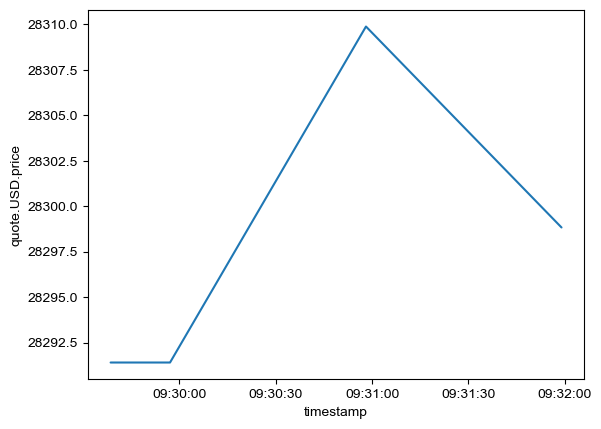

In [171]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data = df_price)
plt.show()